## Change detector in gas hydrates  

Set up some scripts to visualize change using a simple change detector.  

In [1]:
import h5py
import numpy as np
from tomo_encoders import DataFile, Patches
from tomo_encoders.misc.voxel_processing import modified_autocontrast, normalize_volume_gpu
import matplotlib.pyplot as plt
import tqdm
from pdb import set_trace

In [2]:
fpath = '/data02/MyArchive/tomo_datasets/gas_hydrates/data/exp2_time_19p6_101_102_107to110_113to185.h5'

def get_tsteps(fpath):
    hf = h5py.File(fpath)
    l = [int(key) for key in hf.keys()]
    hf.close()
    return np.asarray(l)   

In [3]:
time_steps = get_tsteps(fpath)

In [4]:
print(time_steps)

[101 102 107 108 109 110 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185]


In [5]:
def load_datasets(fpath, tsteps = None):
    
    if tsteps is None:
        tsteps = get_tsteps(fpath)
    vols = []
    
    for ii, tstep in enumerate(tqdm.tqdm(tsteps)):
        ds = DataFile(fpath, data_tag = "%03d"%tstep, tiff = False, VERBOSITY = 0)        
        vol = ds.read_full()
        vol = (vol/255.0).astype(np.float16)
        vols.append(vol)
        
    return vols

In [6]:
sel_tsteps = time_steps[::20]

In [7]:
vols = load_datasets(fpath, tsteps = sel_tsteps)

100%|█████████████████████████████████████████████| 4/4 [00:25<00:00,  6.26s/it]


### What's next?  

So we have 8 time-steps loaded up and we can now train whatever.

In [8]:
from tsne_detector import params, change_detector

In [9]:
p = Patches(vols[0].shape, initialize_by='regular-grid', patch_size = (32,32,32))

In [10]:
p_sel = change_detector(vols[:2], tuple([64]*3), 1, verbosity = True)

--------------------------------------------------------------------------------
TSNE(n_components=1, n_iter=100, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 0.35 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.04 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=240.67 for 250 iterations...
Iteration   50, KL divergence 4.4295, 50 iterations in 0.0766 sec
Iteration  100, KL divergence 4.4394, 50 iterations in 0.0829 sec
Iteration  150, KL divergence 4.4175, 50 iterations in 0.0879 sec
Iteration  200, KL divergence 4.4099, 50 iterations in 0.0845 sec
Iteration  250, KL divergence 4.4098, 50 iterations in 0.0856 sec
   --> Time elapsed: 0.42 seconds
===> Running optimization with exaggerati

In [11]:
from vis_utils import show_in_volume

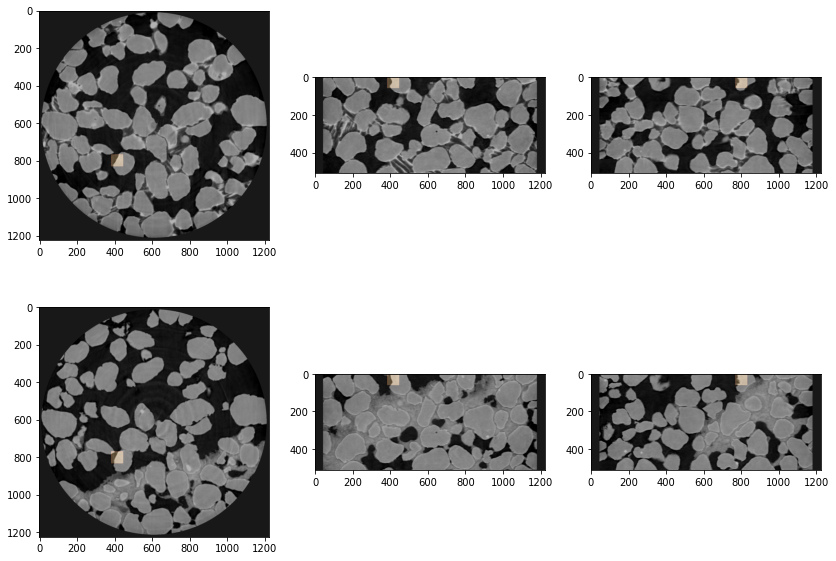

In [12]:
show_in_volume(vols[:2], p_sel, 0)

In [13]:
# len(p_sel)